In [11]:
import numpy as np
from dualtime.src.mclachlan import VarQITE
from gibbs.utils import create_hamiltonian_lattice,printarray,expected_state,state_from_ansatz
from gibbs.preparation.varqite import efficient_su2_ansatz,brute_force_optimization, efficient_su2_ansatz_V3, pauli_rotations_ansatz
from gibbs.preparation.free_energy import brute_cmaes
from qiskit.opflow import PauliSumOp
from qiskit.quantum_info import SparsePauliOp, state_fidelity
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


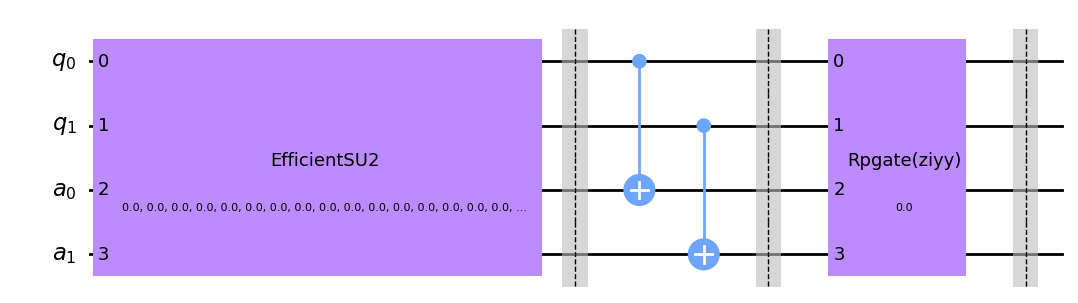

In [15]:
beta = 1.0
hamiltonian = SparsePauliOp.from_list([("XY",-1.0),("YX",-1.0),("ZZ",1.0)])
N = hamiltonian.num_qubits
# ansatz,x0 = pauli_rotations_ansatz(SparsePauliOp.from_list([("XY",-1.0)]),depth = 3,entanglement="reverse_linear",rotations_number=1)
ansatz,x0 = efficient_su2_ansatz(hamiltonian,depth = 2,entanglement="reverse_linear")
display(ansatz.bind_parameters(x0).draw(output='mpl'))
varqite = VarQITE(ansatz,x0,backend=None)
result = varqite.evolve(PauliSumOp(hamiltonian^("I"*N)),beta/2,timestep = 0.01)
final_state = state_from_ansatz(ansatz,result.parameters[-1])

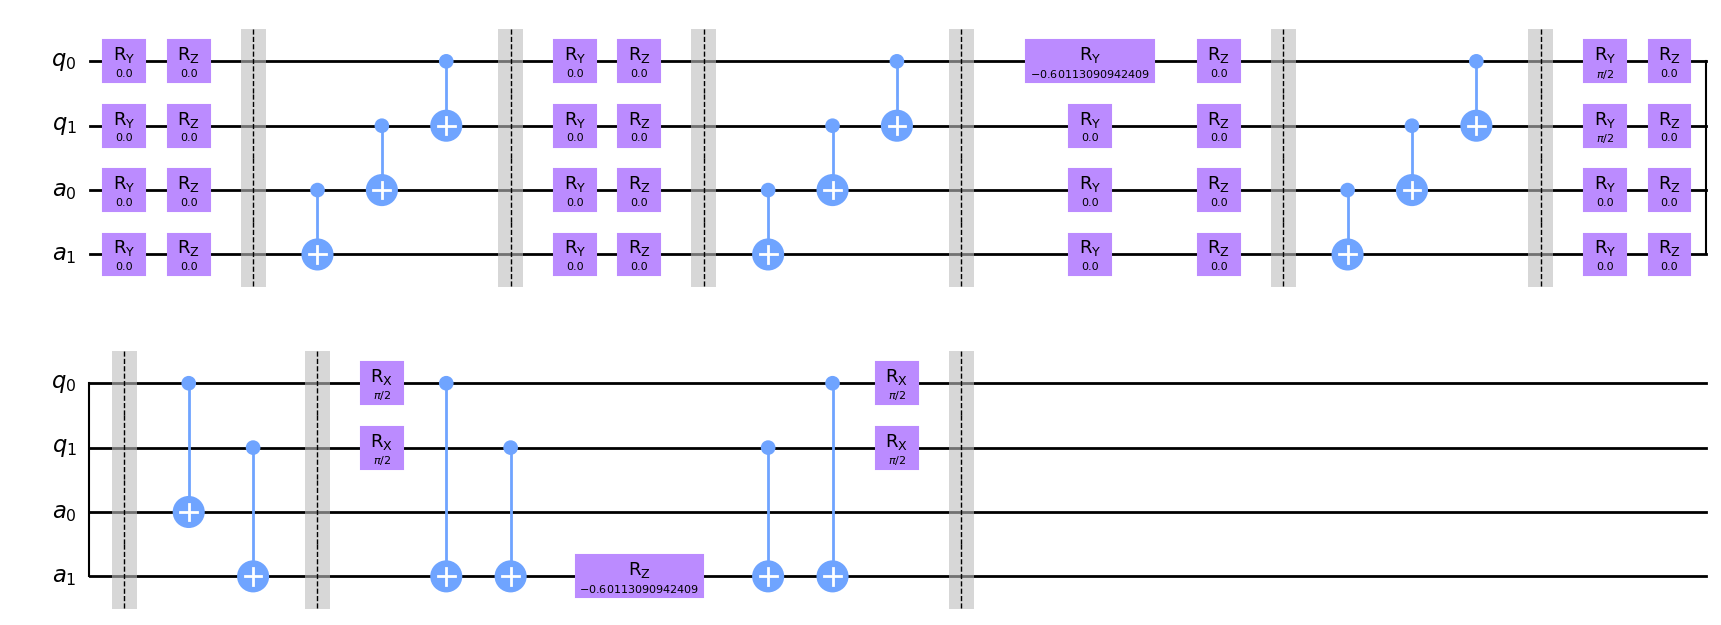

In [17]:
final_parameters = np.zeros_like(x0)
final_parameters[np.abs(result.parameters[-1])>1e-10] = result.parameters[-1][np.abs(result.parameters[-1])>1e-10]
display(ansatz.decompose().bind_parameters(np.round(final_parameters,14)).draw(output='mpl'))

In [19]:
ansatz.num_qubits

4

In [12]:
print("The max difference is:", np.max(np.abs(final_state-expected_state(hamiltonian,beta))))
print("The fidelity between the 2 states is:", state_fidelity(final_state,expected_state(hamiltonian,beta)))
print("Using VarQITE we get the following state:")
printarray(final_state,3,np.abs)
print("The expected state is:")
printarray(expected_state(hamiltonian,beta),3,np.abs)

The max difference is: 0.2240461867006454
The fidelity between the 2 states is: 0.7141316728430683
Using VarQITE we get the following state:
[[0.109 0.    0.    0.061]
 [0.    0.391 0.221 0.   ]
 [0.    0.221 0.391 0.   ]
 [0.061 0.    0.    0.109]]
The expected state is:
[[0.169 0.    0.    0.163]
 [0.    0.331 0.    0.   ]
 [0.    0.    0.331 0.   ]
 [0.163 0.    0.    0.169]]


In [55]:
brute_params,loss,fevals = brute_cmaes(ansatz=ansatz, hamiltonian=hamiltonian, beta=beta, max_evals=10000)
print(loss,fevals)

-2.1647856596775563 7579


In [56]:
brute_state= state_from_ansatz(ansatz,brute_params)

print("The max difference is:", np.max(np.abs(final_state-expected_state(hamiltonian,beta))))
print("Using VarQITE we get the following state:")
printarray(final_state,3,np.abs)
print("The expected state is:")
printarray(expected_state(hamiltonian,beta),3,np.abs)
print("Optimizing the parameters of the ansatz using brute force we get the following state:")
printarray(brute_state,3,np.abs)

The max difference is: 0.31660362959924965
Using VarQITE we get the following state:
[[0.09  0.    0.    0.011]
 [0.    0.41  0.011 0.   ]
 [0.    0.011 0.09  0.   ]
 [0.011 0.    0.    0.41 ]]
The expected state is:
[[0.407 0.    0.    0.157]
 [0.    0.093 0.157 0.   ]
 [0.    0.157 0.407 0.   ]
 [0.157 0.    0.    0.093]]
Optimizing the parameters of the ansatz using brute force we get the following state:
[[0.407 0.    0.    0.157]
 [0.    0.093 0.157 0.   ]
 [0.    0.157 0.407 0.   ]
 [0.157 0.    0.    0.093]]


In [ ]:
from surfer.gradient import ReverseGradient
gradient = ReverseGradient(do_checks=False)
print(gradient.compute(hamiltonian^("I"*N), ansatz, x0))
display(ansatz.decompose().draw())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


┌──────────┐┌──────────┐ ░                 ░  ┌──────────┐┌───────────┐ ░ »
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├─░─────────────■───░──┤ Ry(θ[8]) ├┤ Rz(θ[12]) ├─░─»
     ├──────────┤├──────────┤ ░           ┌─┴─┐ ░  ├──────────┤├───────────┤ ░ »
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├─░────────■──┤ X ├─░──┤ Ry(θ[9]) ├┤ Rz(θ[13]) ├─░─»
     ├──────────┤├──────────┤ ░      ┌─┴─┐└───┘ ░ ┌┴──────────┤├───────────┤ ░ »
a_0: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├─░───■──┤ X ├──────░─┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├─░─»
     ├──────────┤├──────────┤ ░ ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤ ░ »
a_1: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├─░─┤ X ├───────────░─┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├─░─»
     └──────────┘└──────────┘ ░ └───┘           ░ └───────────┘└───────────┘ ░ »
«                     ░ ┌───────────┐┌───────────┐ ░                 ░ »
«q_0: ────────────■───░─┤ Ry(θ[16]) ├┤ Rz(θ[20]) ├─░─────────────■───░─»
«               ┌─┴─┐ ░ ├───────────┤├───────────┤ ░           ┌─┴─┐ ░ »
«q_1: ───────■──┤ X ├─░─┤ Ry(θ[17]) ├┤ Rz(θ[21]) ├─░────────■──┤ X ├─░─»
«          ┌─┴─┐└───┘ ░ ├───────────┤├───────────┤ ░      ┌─┴─┐└───┘ ░ »
«a_0: ──■──┤ X ├──────░─┤ Ry(θ[18]) ├┤ Rz(θ[22]) ├─░───■──┤ X ├──────░─»
«     ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤ ░ ┌─┴─┐└───┘      ░ »
«a_1: ┤ X ├───────────░─┤ Ry(θ[19]) ├┤ Rz(θ[23]) ├─░─┤ X ├───────────░─»
«     └───┘           ░ └───────────┘└───────────┘ ░ └───┘           ░ »
«     ┌───────────┐┌───────────┐ ░                 ░ ┌───────────┐┌───────────┐»
«q_0: ┤ Ry(θ[24]) ├┤ Rz(θ[28]) ├─░─────────────■───░─┤ Ry(θ[32]) ├┤ Rz(θ[36]) ├»
«     ├───────────┤├───────────┤ ░           ┌─┴─┐ ░ ├───────────┤├───────────┤»
«q_1: ┤ Ry(θ[25]) ├┤ Rz(θ[29]) ├─░────────■──┤ X ├─░─┤ Ry(θ[33]) ├┤ Rz(θ[37]) ├»
«     ├───────────┤├───────────┤ ░      ┌─┴─┐└───┘ ░ ├───────────┤├───────────┤»
«a_0: ┤ Ry(θ[26]) ├┤ Rz(θ[30]) ├─░───■──┤ X ├──────░─┤ Ry(θ[34]) ├┤ Rz(θ[38]) ├»
«     ├───────────┤├───────────┤ ░ ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤»
«a_1: ┤ Ry(θ[27]) ├┤ Rz(θ[31]) ├─░─┤ X ├───────────░─┤ Ry(θ[35]) ├┤ Rz(θ[39]) ├»
«     └───────────┘└───────────┘ ░ └───┘           ░ └───────────┘└───────────┘»
«      ░                 ░ ┌───────────┐┌───────────┐          
«q_0: ─░─────────────■───░─┤ Ry(θ[40]) ├┤ Rz(θ[44]) ├──■───────
«      ░           ┌─┴─┐ ░ ├───────────┤├───────────┤  │       
«q_1: ─░────────■──┤ X ├─░─┤ Ry(θ[41]) ├┤ Rz(θ[45]) ├──┼────■──
«      ░      ┌─┴─┐└───┘ ░ ├───────────┤├───────────┤┌─┴─┐  │  
«a_0: ─░───■──┤ X ├──────░─┤ Ry(θ[42]) ├┤ Rz(θ[46]) ├┤ X ├──┼──
«      ░ ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤└───┘┌─┴─┐
«a_1: ─░─┤ X ├───────────░─┤ Ry(θ[43]) ├┤ Rz(θ[47]) ├─────┤ X ├
«      ░ └───┘           ░ └───────────┘└───────────┘     └───┘

In [ ]:
brute_result = brute_force_optimization(hamiltonian,ansatz,x0,beta = beta)

(-1.3862943611198908+0j)
(-0.970116539379804+0j)
(-0.9701165393798041+0j)
(-0.970116539379804+0j)
(-0.9701165393798038+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-0.9701165393798041+0j)
(-0.9701165393798041+0j)
(-0.9701165393798038+0j)


/home/drudis/python_environements/JulienVarQITE/lib64/python3.10/site-packages/scipy/optimize/_cobyla_py.py:273: ComplexWarning: Casting complex values to real discards the imaginary part
  xopt, info = cobyla.minimize(calcfc, m=m, x=np.copy(x0), rhobeg=rhobeg,


(-0.9701165393798038+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-0.970116539379804+0j)
(-1.3862943611198906+0j)
(-0.970116539379804+0j)
(-0.9701165393798038+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198906+0j)
(-1.3862943611198906+0j)
(-0.9701165393798038+0j)
(-0.9701165393798038+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-0.970116539379804+0j)
(-0.9701165393798041+0j)
(-0.970116539379804+0j)
(-0.9701165393798038+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-1.3862943611198904+0j)
(-0.9701165393798041+0j)
(-0.9701165393798041+0j)
(-0.9701165393798041+0j)
(-0.9701165393798039+0j)
(-1.3862943611198904+0j)
(-1.3862943611198908+0j)
(-1.3862943611198908+0j)
(-1.3862943611198908+0j)
(-0.8955986546050507+0j)
(-1.0802754454912284+0j)
(-1.2909397915118783+0j)
(-1.

In [ ]:
state = state_from_ansatz(ansatz,brute_result.x)
from qiskit.quantum_info import entropy
entropy(state)

2.0000000000000004

In [ ]:
printarray(state)

[[ 0.25 -0.   -0.   -0.  ]
 [-0.    0.25 -0.   -0.  ]
 [-0.   -0.    0.25  0.  ]
 [-0.   -0.    0.    0.25]]


In [97]:
import random
random.choices(hamiltonian.paulis,np.abs(hamiltonian.coeffs),k=10)

[Pauli('XY'),
 Pauli('YX'),
 Pauli('ZZ'),
 Pauli('ZZ'),
 Pauli('YX'),
 Pauli('XY'),
 Pauli('ZZ'),
 Pauli('XY'),
 Pauli('YX'),
 Pauli('XY')]